<a href="https://colab.research.google.com/github/sugban/Python-Learning-/blob/main/Lesson%2030/Lesson_30_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Plotly
* Plotly is a library, which is used to design graphs, especially interactive graphs
* Graphs can be saved offline as well
* Plotly is useful in the field of statistical analysis, data visualization etc.
* **plotly.graph.objects** module contains the objects that are responsible for constructing plots (figure, layout, data, and plot definitions such as scatter plots and line charts)
* To create easy to style and an entire figure at once, we use **plotly.express**
* We can import plotly in different ways:
<pre>
import plotly
import plotly.graph_objects as go
import plotly.express as px
</pre>


In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# reading csv file and creating a dataframe

df = pd.read_csv('nba.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [4]:
# how to handle missing value in Pandas

df.dropna(inplace=True)  # it will drop all the rows in which any column has missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      364 non-null    object 
 1   Team      364 non-null    object 
 2   Number    364 non-null    float64
 3   Position  364 non-null    object 
 4   Age       364 non-null    float64
 5   Height    364 non-null    object 
 6   Weight    364 non-null    float64
 7   College   364 non-null    object 
 8   Salary    364 non-null    float64
dtypes: float64(4), object(5)
memory usage: 28.4+ KB


1. Basic Charts

In [5]:
# line chart

fig = px.line(df, x=df['Height'].value_counts(), y=df['Height'].unique(), title='Number of participants with different height segments')
fig.show()

#### Labelling plot

We can plot even many points with having the same number of points in both axis, so if x-axis has 4 elements, y-axis also should have 4 elements

In [6]:
fig = px.line(df, 
              x=df['Height'].unique(), 
              y=df['Height'].value_counts(), 
              labels={
                     'x': "Height range",
                     'y': "No of participants"
                 },
              title='Number of participants with different height segments')


fig.show()

In [7]:
# Bar plot - bar() method to generate bar plot

fig = px.bar(df,
             x=df['Height'].unique(), 
              y=df['Height'].value_counts(), 
              labels={
                     'x': "Height range",
                     'y': "No of participants"
                 },
              title='Number of participants with different height segments')
fig.show()

In [8]:
# Scatter plot with scatter() method

fig = px.scatter(df,
             x='Height', 
              y='Weight', 
              title='Number of participants with different height segments')
fig.show()

In [9]:
df1=pd.read_csv('data.csv')
df1

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [10]:
# If you want to plot multiple lines in one chart, you can call the plot() function multiple times

fig= px.scatter(df1,'Calories',['Pulse','Maxpulse'])

fig.show()

In [11]:
# pie chart

y = df['Age'].value_counts()

fig = px.pie(df, values=y, names=y.index)
fig.show()

2. Statistical chart

such as box plots, histograms, and distrubution plots


---

BOX PLOT

It is a chart that depicts a group of numerical data through their quartiles. It is a simple way to visualize the shape of our data. It makes comparing characteristics of data between categories very easy.

A box plot gives a five-number summary of a set of data which is-

1. Minimum – It is the minimum value in the dataset excluding the outliers
2. First Quartile (Q1) – 25% of the data lies below the First (lower) Quartile.
3. Median (Q2) – It is the mid-point of the dataset. Half of the values lie below it and half above.
4. Third Quartile (Q3) – 75% of the data lies below the Third (Upper) Quartile.
5. Maximum – It is the maximum value in the dataset excluding the outliers.
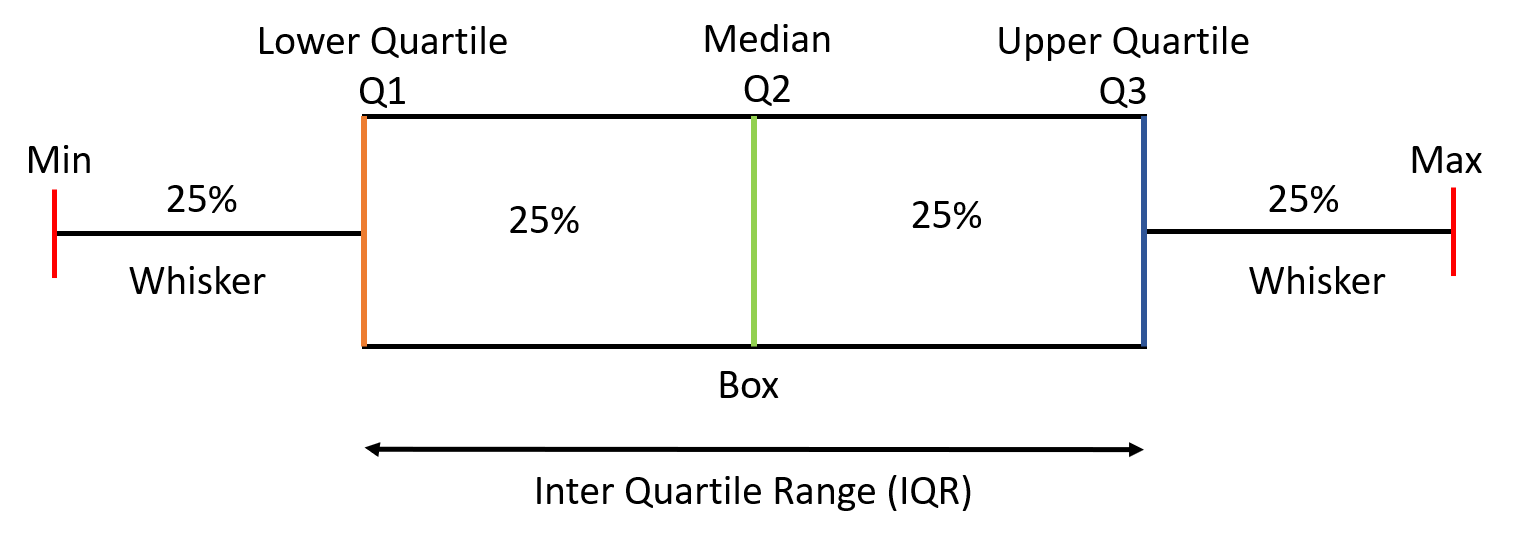

The plots can have skewness and the median might not be at the center of the box. Box Plots shows Skewness of the data-

* If the Median is at the center of the Box and the whiskers are almost the same on both the ends, then the data is Normally Distributed.
* If the Median lies closer to the First Quartile and if the whisker at the lower end is shorter, then it has a Positive Skew (Right Skew).
* If the Median lies closer to the Third Quartile and if the whisker at the upper end is shorter then it has a Negative Skew (Left Skew).

In [12]:
fig = px.box(df, y="Salary")
fig.show()

In [13]:
fig=px.histogram(df['Age'])
fig.show()

By default, the number of bins is chosen so that this number is comparable to the typical number of samples in a bin. This number can be customized, as well as the range of values.

In [14]:
fig=px.histogram(df['Age'], nbins=10)
fig.show()

In [15]:
# Here we use a column with categorical data
fig = px.histogram(df, x='Team')
fig.show()